### 讀取大盤資料

In [6]:
from finlab.data import Data

data = Data()

twii = data.get("發行量加權股價指數")

twii = twii['台股指數']

twii.tail()

date
2019-08-12 13:29:40    10488.66
2019-08-12 13:29:45    10488.66
2019-08-12 13:29:50    10488.66
2019-08-12 13:29:55    10488.66
2019-08-12 13:30:00    10472.36
Name: 台股指數, dtype: float64

### 整理加權指數 1分k

In [7]:
twii = twii[twii.index.second == 0]  #排除秒數不為0的資料

### 畫的更美一點

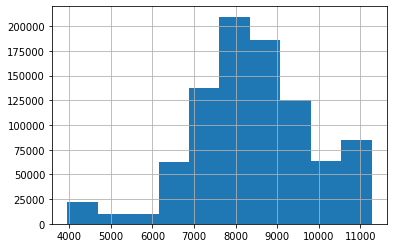

In [8]:
import matplotlib.pyplot as plt
plt.style.use
%matplotlib inline
twii.hist()

### DataFrame 小教室：groupby

In [9]:
import pandas as pd

s = pd.Series([1,2,3,4,5,6,7,8])
s.groupby([0,1,0,1,0,1,0,1]).prod()  
# 1 * 3 * 5 * 7 = 105
# 2 * 4 * 6 * 8 = 384

0    105
1    384
dtype: int64

In [10]:
df = pd.DataFrame({'a':s, 'b':s})
df
df.groupby([1,2,1,2,1,2,1,2]).prod()

a    b
1  105  105
2  384  384

In [11]:
twii.tail()                     #抓五筆資料最新資料

date
2019-08-02 13:26:00    10564.39
2019-08-02 13:27:00    10564.39
2019-08-02 13:28:00    10564.39
2019-08-02 13:29:00    10564.39
2019-08-02 13:30:00    10549.04
Name: 台股指數, dtype: float64

### 每月漲跌

In [10]:
start_price = twii.groupby([twii.index.year, twii.index.month]).first()
last_price = twii.groupby([twii.index.year, twii.index.month]).last()
profit = (last_price/start_price)

profit.index.levels[0].name = 'year'       #重新命名index第一層為year，因為本來為date
profit.index.levels[1].name = 'month'      #重新命名index第二層為month，因為本來為date
profit
profit = profit.reset_index()
profit = profit.pivot("year","month")      #['台股指數']
profit
#profit

台股指數                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2006   0.997532  1.004508  1.007977  1.084337  0.954709  0.979182  0.962736   
2007   0.984141  1.026277  0.997779  0.998860  1.034224  1.090640  1.045484   
2008   0.884186  1.118550  1.018999  1.040516  0.966273  0.872894  0.933611   
2009   0.925238  1.072783  1.143443  1.150020  1.149831  0.933490  1.100363   
2010   0.933114  0.973255  1.065083  1.010630  0.921258  0.993950  1.058840   
2011   1.019264  0.940330  1.009727  1.037379  0.997887  0.962593  0.999028   
2012   1.062923  1.080398  0.976797  0.945635  0.973310  0.999285  0.996465   
2013   1.019549  1.006110  1.002612  1.022106  1.019909  0.976669  1.005672   
2014   0.982705  1.020917  1.024272  0.993464  1.032358  1.034945  0.991779   
2015   1.005872  1.027792  0.996294  1.024369  0.987884  0.961030  0.929456   
2016   0.976871  1.032651  1.039670  0.958040  1.018822  1.015346  1.036673   
2017   1.021014  1.032020  1.006261  1.006164  1.017091  1.035291  1.003103   
2018   1.043309  0.974034  1.009618  0.976042  1.020368  0.996501  1.020356   
2019   1.021059  1.046003  1.024244  1.030701  0.957216  1.022131  1.008665   

                                                         
month        8         9         10        11        12  
year                                                     
2006   1.024353  1.041030  1.020088  1.077820  1.033828  
2007   0.967150  1.055038  1.024782  0.884159  0.990669  
2008   1.003139  0.811693  0.851621  0.915788  1.029308  
2009   0.964429  1.100092  0.977482  1.032987  1.079911  
2010   0.981400  1.081602  1.005986  1.010304  1.071666  
2011   0.895557  0.933348  1.050144  0.909911  1.024328  
2012   1.017409  1.043004  0.928827  1.057789  1.015742  
2013   0.989387  1.018946  1.033789  0.994884  1.024347  
2014   1.012926  0.950261  1.000874  1.023665  1.013074  
2015   0.943404  1.000773  1.045601  0.972680  1.002097  
2016   1.009399  1.010806  1.013447  0.994681  1.001384  
2017   1.015196  0.980933  1.039471  0.978380  1.007805  
2018   1.000582  0.994794  0.890589  1.008763  0.983756  
2019   0.967530       NaN       NaN       NaN       NaN

### 每月漲跌色溫圖

C:\Users\Daniel\Anaconda3\envs\finlab\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Daniel\Anaconda3\envs\finlab\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Daniel\Anaconda3\envs\finlab\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Daniel\Anaconda3\envs\finlab\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Daniel\Anaconda3\envs\finlab\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Daniel\Anaconda3\envs\finlab\lib\site-packages\matplo

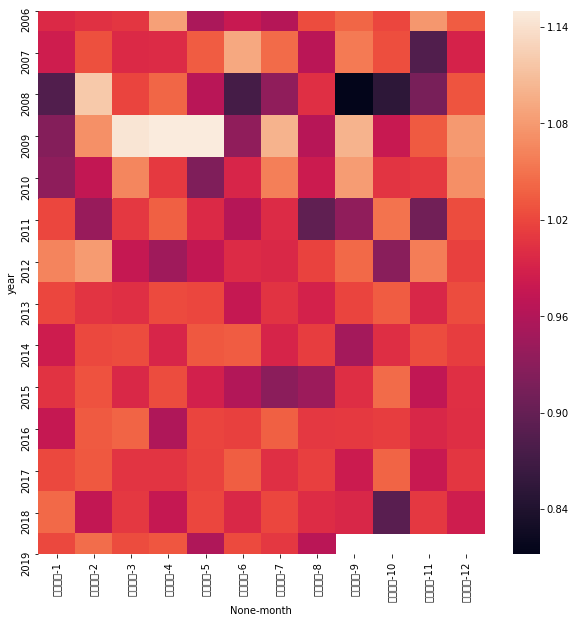

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(profit)

### 均線分析

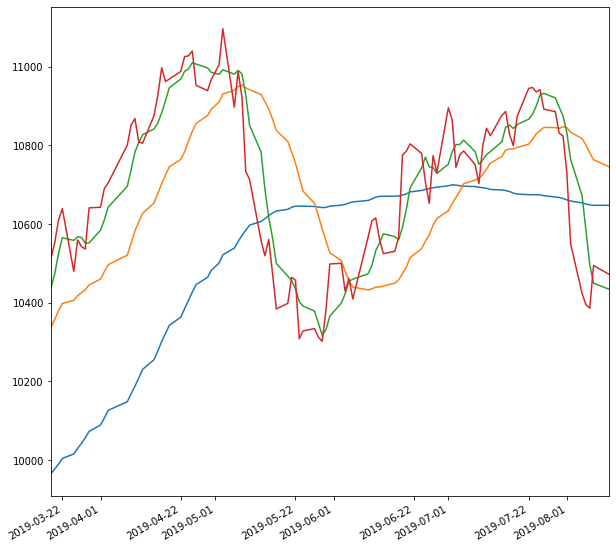

In [12]:
# 每日開盤價
twii_daily = twii.groupby(twii.index.date).last()
twii_daily.index = pd.to_datetime(twii_daily.index)  #pandas內建將index內的物件轉換為datetime的函數

# 平均線計算
twii_average = twii_daily.rolling(60).mean()

twii_average60 = twii_daily.rolling(60).mean()   # ma60季均線
twii_average20 = twii_daily.rolling(20).mean()   # ma20月均線
twii_average5 = twii_daily.rolling(5).mean()     # ma5 周均線
twii_average1 = twii_daily                       # ma1 
twii_average60.tail(100).plot()
twii_average20.tail(100).plot()
twii_average5.tail(100).plot()
twii_average1.tail(100).plot()


# 乖離率
twii_bias = twii_daily / twii_average

# 後60日漲跌
twii_profit = twii_daily.shift(-60) / twii_daily

# 將資料合併（方便之後做圖）
df = pd.DataFrame({
    'price': twii_daily,
    'sma': twii_average,
    'bias': twii_bias,               #乖離率
    'profit': twii_profit,           #預測60天之後的價格 ，驗證用!
    'year': twii_daily.index.year,   #年
})


# 刪除NaN
df = df.dropna(how='any')
#df.tail()                          #取最新200筆資料

### 乖離率做圖

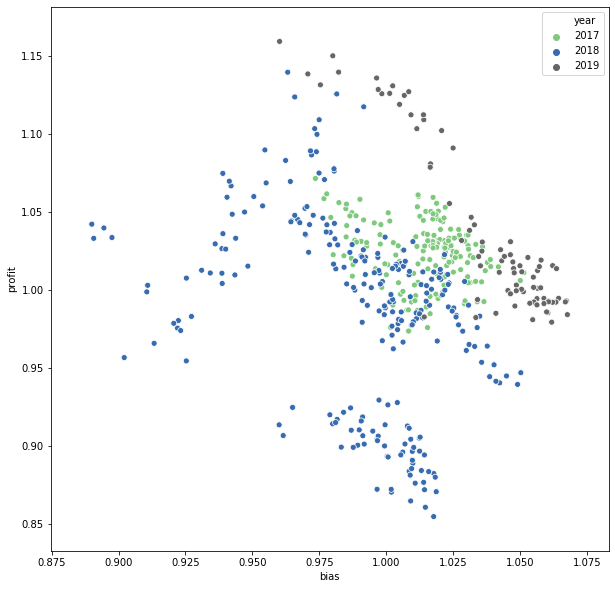

In [39]:
sns.scatterplot(x="bias", y="profit", data=df.tail(500), hue="year", palette="Accent", legend="full")

### 查看當前的乖離率

In [38]:
twii_bias.tail(200)

2018-10-08    0.959953
2018-10-09    0.961470
2018-10-11    0.902121
2018-10-12    0.925302
2018-10-15    0.913285
2018-10-16    0.922010
2018-10-17    0.923205
2018-10-18    0.922336
2018-10-19    0.920629
2018-10-22    0.927222
2018-10-23    0.910550
2018-10-24    0.910880
2018-10-25    0.890739
2018-10-26    0.890015
2018-10-29    0.894537
2018-10-30    0.897547
2018-10-31    0.925329
2018-11-01    0.931020
2018-11-02    0.938598
2018-11-05    0.938695
2018-11-06    0.934252
2018-11-07    0.943439
2018-11-08    0.948281
2018-11-09    0.938610
2018-11-12    0.940000
2018-11-13    0.936071
2018-11-14    0.938966
2018-11-15    0.943738
2018-11-16    0.942437
2018-11-19    0.947047
                ...   
2019-06-24    1.008811
2019-06-25    1.001748
2019-06-26    0.996499
2019-06-27    1.007642
2019-06-28    1.003476
2019-07-01    1.018545
2019-07-02    1.015454
2019-07-03    1.004202
2019-07-04    1.007324
2019-07-05    1.008372
2019-07-08    1.005236
2019-07-09    1.000867
2019-07-10 